# Support Vector Machines 


## Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.



## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("wine_fraud.csv")

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [11]:
#Understand the Structure of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [13]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.0

In [17]:
#check for missing values\
df.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [19]:
#value counts for categorical columns
df['type'].value_counts()
df['quality'].value_counts()


quality
Legit    6251
Fraud     246
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

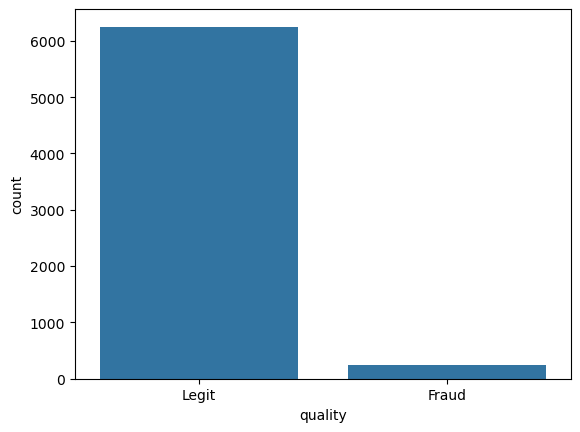

In [21]:
sns.countplot(x='quality',data=df)

Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.

<Axes: xlabel='type', ylabel='count'>

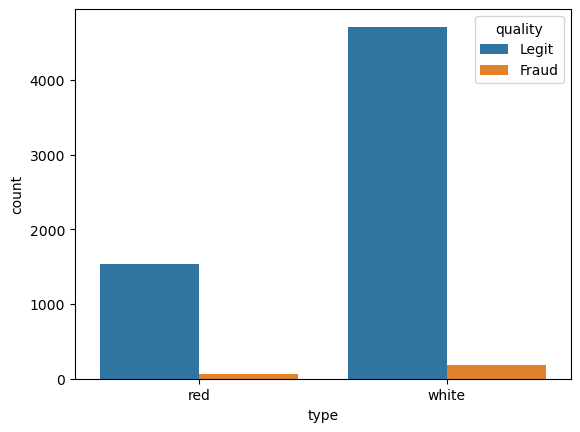

In [24]:
sns.countplot(x='type',hue='quality',data=df)

In [26]:
red_wine = df[df["type"]=='red']

In [30]:
white_wine = df[df["type"]=='white']

In [32]:
print("Percentage of fraud in Red Wines:")
print(100* (len(red_wine[red_wine['quality']=='Fraud'])/len(red_wine)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [34]:
print("Percentage of fraud in White Wines:")
print(100* (len(white_wine[white_wine['quality']=='Fraud'])/len(white_wine)))

Percentage of fraud in White Wines:
3.7362188648427925


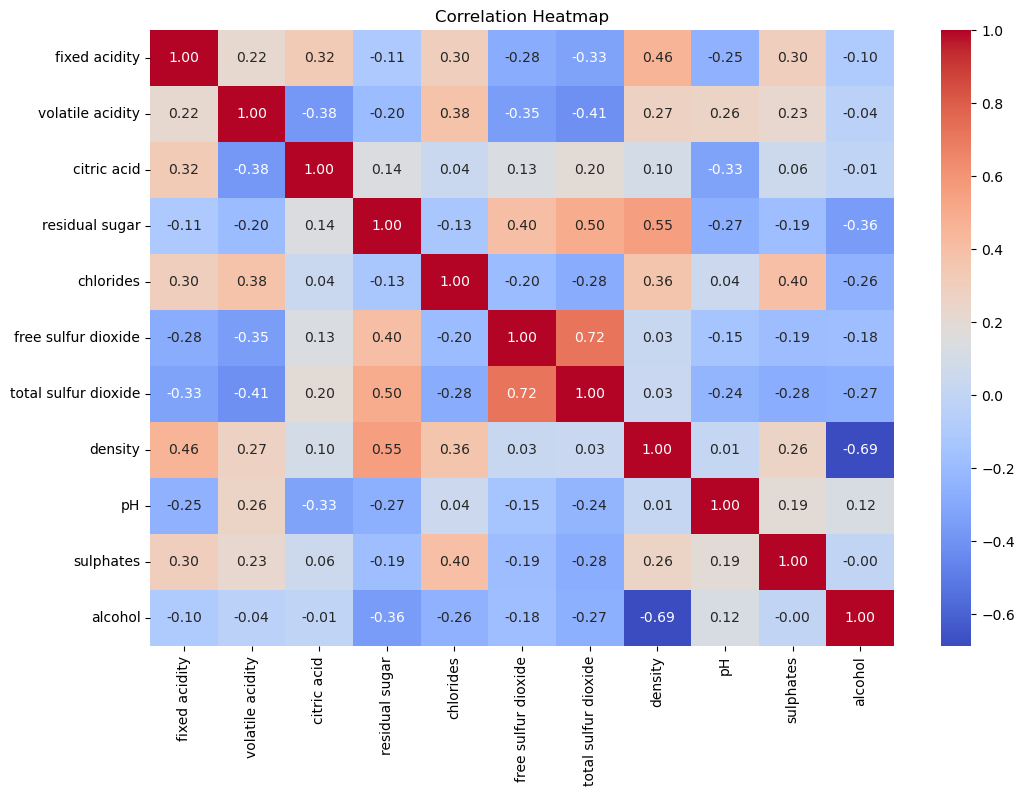

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Key Observations From Your Heatmap:
🔸 Strong Positive Correlations
free sulfur dioxide vs total sulfur dioxide → 0.72

Makes sense: free SO₂ is part of total SO₂

residual sugar vs density → 0.55

Denser wines tend to have more residual sugar.

fixed acidity vs density → 0.46

Acid increases density slightly.

🔹 Strong Negative Correlations
alcohol vs density → -0.69

Higher alcohol = lower density (since alcohol is less dense than water).

citric acid vs pH → -0.33

More citric acid → more acidic → lower pH.

total sulfur dioxide vs alcohol → -0.27

Slight inverse relation; could imply preservation methods vary by alcohol content.

🔸 Low/Negligible Correlations
alcohol has weak or negligible correlation with most variables other than density.

sulphates has a slight positive correlation with many things but nothing strong.

pH doesn't correlate strongly with most variables—again, it makes sense as it's influenced by several complex interactions.

In [41]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [45]:
# Simulate a few fraudulent entries for testing (example: mark wines with alcohol < 9 as fraud)
df['Fraud'] = (df['alcohol'] < 9).astype(int)


In [47]:
df.corr(numeric_only=True)['Fraud'].sort_values(ascending=False)


Fraud                   1.000000
residual sugar          0.340607
density                 0.268941
total sulfur dioxide    0.198680
free sulfur dioxide     0.185890
citric acid             0.112424
chlorides              -0.019276
fixed acidity          -0.031233
sulphates              -0.076990
volatile acidity       -0.083851
pH                     -0.142648
alcohol                -0.330742
Name: Fraud, dtype: float64

## Machine Learning Development

In [51]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [53]:
df = df.drop('Fraud',axis=1)

In [55]:
X = df.drop('quality',axis=1)
y = df['quality']

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

-**Standardization** transforms features to have mean = 0 and std = 1.

-This is essential for algorithms like SVM that are sensitive to feature scales.

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [67]:
from sklearn.svm import SVC

In [69]:
svc = SVC(class_weight='balanced')

class_weight='balanced' tells the model to adjust weights for imbalanced classes (if some classes appear more frequently).

In [71]:
from sklearn.model_selection import GridSearchCV

**GridSearchCV** tests different combinations of hyperparameters:

C: Regularization parameter (lower = more regularization)

gamma: Kernel coefficient

It searches for the best combination by cross-validation.

In [73]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [75]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [77]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
grid_pred = grid.predict(scaled_X_test)

In [83]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [85]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



#### Class: Fraud
Precision (0.16): Only 16% of predicted frauds are actually fraud.

Recall (0.63): 63% of actual frauds were correctly predicted.

F1-score (0.25): Low because precision is low.

#### Class: Legit
Precision (0.98): Very high – most predicted Legits are indeed Legit.

Recall (0.85): 85% of actual Legits are identified.

#### Overall:
**Accuracy**: 0.84 → 84% of predictions are correct

**Macro Avg**: Takes equal weight for both classes → f1 = 0.58

**Weighted Avg**: Skewed by more frequent class (Legit) → f1 = 0.88

## 📈 Model Performance Summary

**Best parameters (via GridSearchCV):**  
- `C = 1`, `gamma = 'auto'`

**Test Accuracy:**  
- **84%** – Solid at first glance, but can be misleading due to class imbalance.

### 🧪 Fraud Class Performance:
- **Precision:** 0.16 → Very few of the predicted frauds are actually fraud.
- **Recall:** 0.63 → Caught 63% of all actual frauds.
- **F1-score:** 0.25 → Indicates poor performance overall on the minority class.

### ✅ Legit Class Performance:
- **Precision:** 0.98  
- **Recall:** 0.85  
- **F1-score:** 0.91

---

## ⚠️ Challenges Identified

- The dataset is **highly imbalanced**: Only 27 frauds out of 650 test samples.
- The SVM model, even with `class_weight='balanced'`, still heavily favors the **majority class** (`Legit`).
- The model performs **very well on Legit wines** but **struggles with detecting Fraud** due to limited samples and imbalance.

---
